## Final Project Submission

## Student names: 

* Kevin Riungu 
* Donnah Mwaniki
* Hanan Maalim 
* Winnie Nzuve 
* Mike Kiptoch
* Daniel Muruthi
* Beatrice Adhiambo
* Brian Gikonyo 

## Business Understanding 

In the rapidly evolving laptop market, consumers face a myriad of choices with varying features and price points. As technology enthusiasts, informed consumers, and developers seek laptops tailored to their needs, the project aims to provide a valuable solution. Leveraging machine learning techniques, our goal is to develop a predictive model capable of estimating laptop prices based on a comprehensive set of features. This model serves as a valuable tool for simplifying the decision-making process for potential laptop buyers and providing insights into the pricing dynamics within the market.

## Problem Statement


The challenge at hand is to address the complexity that consumers and tech enthusiasts encounter when navigating the laptop market. With an abundance of laptops featuring diverse specifications, it becomes challenging for users to assess which combination of features offers the best value for their needs. The lack of a systematic approach to understanding how different aspects such as RAM, weight, processor performance, display characteristics, storage, graphics card, and operating system contribute to the overall pricing further complicates the decision-making process.

Our project seeks to bridge this gap by developing a machine learning-based predictive model. The model will analyze a diverse set of laptop features and provide users with an estimated price, empowering them to make informed decisions. This addresses the need for a tool that not only simplifies the evaluation of laptops but also contributes to a deeper understanding of the factors influencing laptop pricing. Whether for personal use or professional development purposes, our solution caters to a broad audience within the tech community.

## Data Understanding

In [2]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest


## DATA PREPARATION AND FUNDAMENTALS

In [34]:
#loading dataset for laptoprices.
laptopprice= pd.read_csv("laptop_data_cleaned.csv")
laptopprice.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [19]:
laptopprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [20]:
laptopprice.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [21]:
categorical_variables = laptopprice.select_dtypes("object")
categorical_variables

,Company,TypeName,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac
...,...,...,...,...,...
1268,Asus,Notebook,Intel Core i7,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1270,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1271,Lenovo,Notebook,Other Intel Processor,Intel,Windows


In [22]:
numeric_variables = laptopprice.drop(["Company", "TypeName", "Cpu_brand", "Gpu_brand", "Os"], axis = 1)
numeric_variables

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256
...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,500,0
1269,4,1.80,10.433899,1,1,157.350512,0,128
1270,16,1.30,11.288115,1,1,276.053530,0,512
1271,2,1.50,9.409283,0,0,111.935204,0,0


In [23]:
print(laptopprice.dtypes)

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object


## Data Cleaning 

In [24]:
laptopprice.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [25]:
laptopprice.drop_duplicates(inplace=True)

In [26]:
from scipy.stats import zscore

numerical_columns = ['Ram', 'Weight', 'Price', 'Ppi']
z_scores = zscore(laptopprice[numerical_columns])
laptopprice = [(z_scores < 3).all(axis=1)]


## LINEAR MODELING

### CREATING A BASELINE SIMPLE LINEAR REGRESSION MODEL

#### Generating a correlation table

In [31]:
numeric_variables.corr()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000


In [32]:
correlation_price =numeric_variables.corr()["Price"]
correlation_price

Ram            0.680519
Weight         0.151386
Price          1.000000
TouchScreen    0.194289
Ips            0.279240
Ppi            0.480687
HDD           -0.097361
SSD            0.658808
Name: Price, dtype: float64

Ram (0.680519):

Positive correlation (0.68) with "Price" suggests that as the amount of RAM increases, the price tends to increase. This indicates a positive relationship between RAM and the price of the laptop.

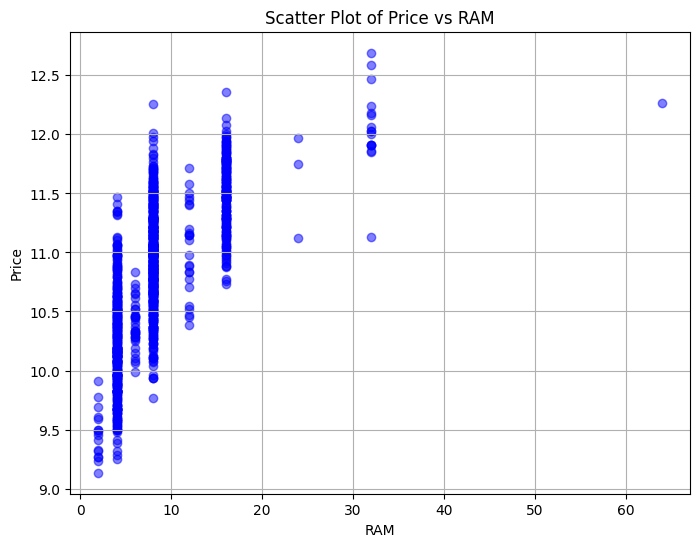

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(laptopprice.Ram, laptopprice.Price, color='blue', alpha=0.5)
plt.title('Scatter Plot of Price vs RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [36]:
import statsmodels.api as sm

X = laptopprice['Ram']
y = laptopprice['Price']  

k = sm.add_constant(X)

model = sm.OLS(y, k).fit()

simple_model_results = model.summary()
simple_model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1096.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          7.26e-174
Time:                        12:20:22   Log-Likelihood:                -800.50
No. Observations:                1273   AIC:                             1605.
Df Residuals:                    1271   BIC:                             1615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1297      0.025    411.105      0.000      10.081      10.178
Ram            0.0827      0.002     33.111      0.000       0.078       0.088
==============================================================================
Omnibus:                       67.410   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.905
Skew:                          -0.364   Prob(JB):                     3.75e-29
Kurtosis:                       4.392   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## INTERPRETATION OF THE RESULTS 

Model Fit:
R-squared: R-squared is a measure of how well the independent variable (RAM) explains the variability of the dependent variable (Price). A value of 0.463 indicates that about 46% of the variation in price is explained by the variation in Ram
F-Statistic pvalue is 7.26e-174 which is far less than 0.05, implying the model is statistically significant

Coefficients:
Constant(Intercept): The intercept of the regression line. In this case, it is 10.1297. This is the estimated value of Price when 'Ram' is 0.

coefficient for Ram = 0.0827 implying that price changes by 0.0827 for each unit increase in Ram

pvalue for the coefficient are both less than 0.05 implying the constant and coefficient are both statistically significant

## Creating Visualizations to represent the model
#### Model Fit

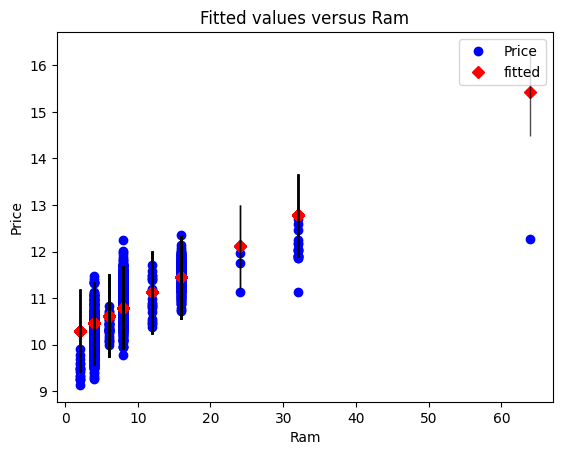

In [37]:
sm.graphics.plot_fit(model, "Ram")
plt.show()

#### A scatter plot with a best_fit Line

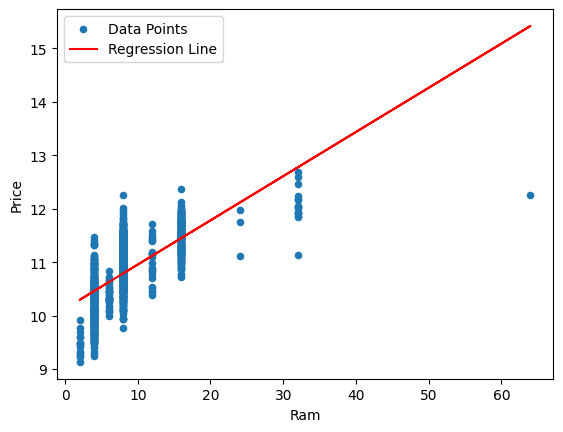

In [38]:
fig, ax = plt.subplots()
laptopprice.plot.scatter(x="Ram", y="Price", label="Data Points", ax=ax)

# Regression line
ax.plot(laptopprice["Ram"], model.predict(), label="Regression Line", color='red')

ax.legend()
plt.show()


#### Plotting the residuals 

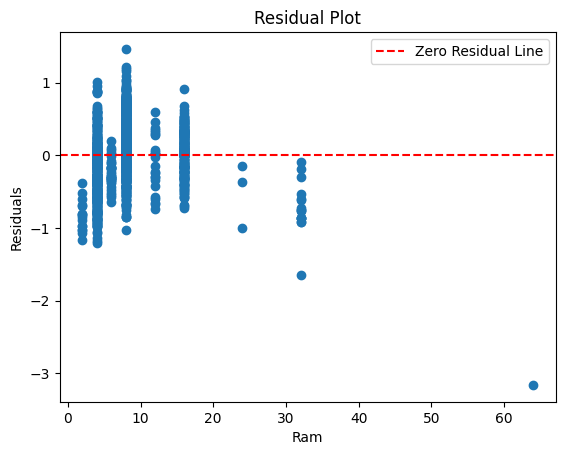

In [39]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = model.resid

# Plot residuals
plt.scatter(laptopprice["Ram"], residuals)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Ram")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()


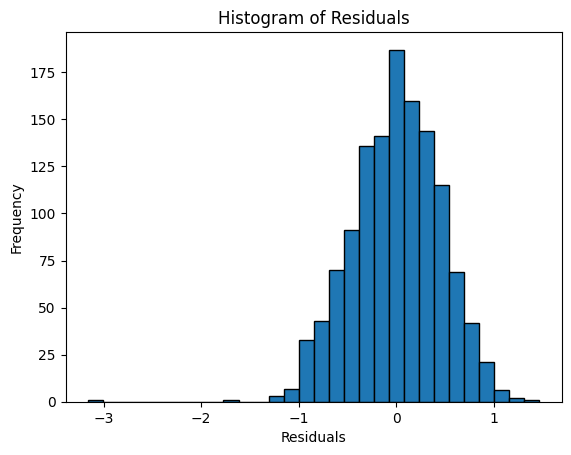

In [40]:

# Calculate residuals
residuals = model.resid

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


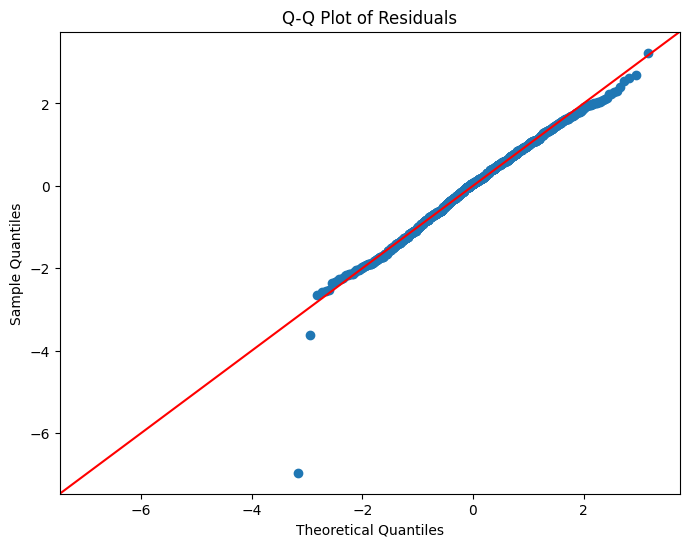

In [41]:
residuals = model.resid

fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True, ax=ax, dist=stats.norm)
ax.set_title('Q-Q Plot of Residuals')
plt.show()


### IMPROVING OUR MODEL WITH MULTIPLE INDEPENDENT VARIABLES 

In [42]:
import pandas as pd

categorical_variables = laptopprice.select_dtypes("object")

dummy_variables = pd.get_dummies(laptopprice, columns=categorical_variables.columns, prefix=categorical_variables.columns, drop_first=True).astype(int)

dummy_variables.head()


,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,8,1,11,0,1,226,0,128,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1,10,0,0,127,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1,10,0,0,141,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1,11,0,1,220,0,512,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1,11,0,1,226,0,256,1,0,...,1,0,0,1,0,0,1,0,0,0


In [43]:
categorical_columns = laptopprice.select_dtypes(include=['object']).columns

laptopprice_dummies = pd.get_dummies(laptopprice, columns=categorical_columns)

# Calculate the correlation matrix for the Price column
correlation_matrix = laptopprice_dummies.corr()['Price'].sort_values(ascending=False)

correlation_matrix


Price                              1.000000
Ram                                0.680519
SSD                                0.658808
Cpu_brand_Intel Core i7            0.593245
Ppi                                0.480687
TypeName_Gaming                    0.362537
Gpu_brand_Nvidia                   0.357157
TypeName_Ultrabook                 0.306406
Os_Windows                         0.294626
Ips                                0.279240
TypeName_Workstation               0.206745
TouchScreen                        0.194289
Company_MSI                        0.188654
Weight                             0.151386
Company_Razer                      0.133549
TypeName_2 in 1 Convertible        0.093719
Os_Mac                             0.093356
Company_Apple                      0.093356
Company_Dell                       0.084610
Company_Toshiba                    0.069182
Company_LG                         0.062273
Company_Microsoft                  0.052978
Company_Samsung                 

#### Generating the multiple regression model

In [44]:
import statsmodels.api as sm

top_features = ['Ram', 'SSD', 'HDD', 'Ppi', 'Weight']

X = sm.add_constant(laptopprice[top_features])

# Dependent variable
y = laptopprice['Price']

model = sm.OLS(y, X).fit()
model_results = model.summary()
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     378.1
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          3.41e-248
Time:                        12:20:54   Log-Likelihood:                -615.19
No. Observations:                1273   AIC:                             1242.
Df Residuals:                    1267   BIC:                             1273.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5479      0.066    144.295      0.000       9.418       9.678
Ram            0.0459      0.003     13.665      0.000       0.039       0.052
SSD            0.0011   9.47e-05     11.406      0.000       0.001       0.001
HDD         2.457e-05   2.84e-05      0.866      0.386   -3.11e-05    8.02e-05
Ppi            0.0035      0.000     10.802      0.000       0.003       0.004
Weight         0.0830      0.023      3.649      0.000       0.038       0.128
==============================================================================
Omnibus:                       16.044   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.652
Skew:                          -0.181   Prob(JB):                     5.40e-05
Kurtosis:                       3.489   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = laptopprice[['Ram', 'Weight', 'HDD', 'Ips', 'Ppi', 'SSD']]
y = laptopprice['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.14246582487913717
R-squared: 0.6403501086603083


### Visualization for the multiple regression model

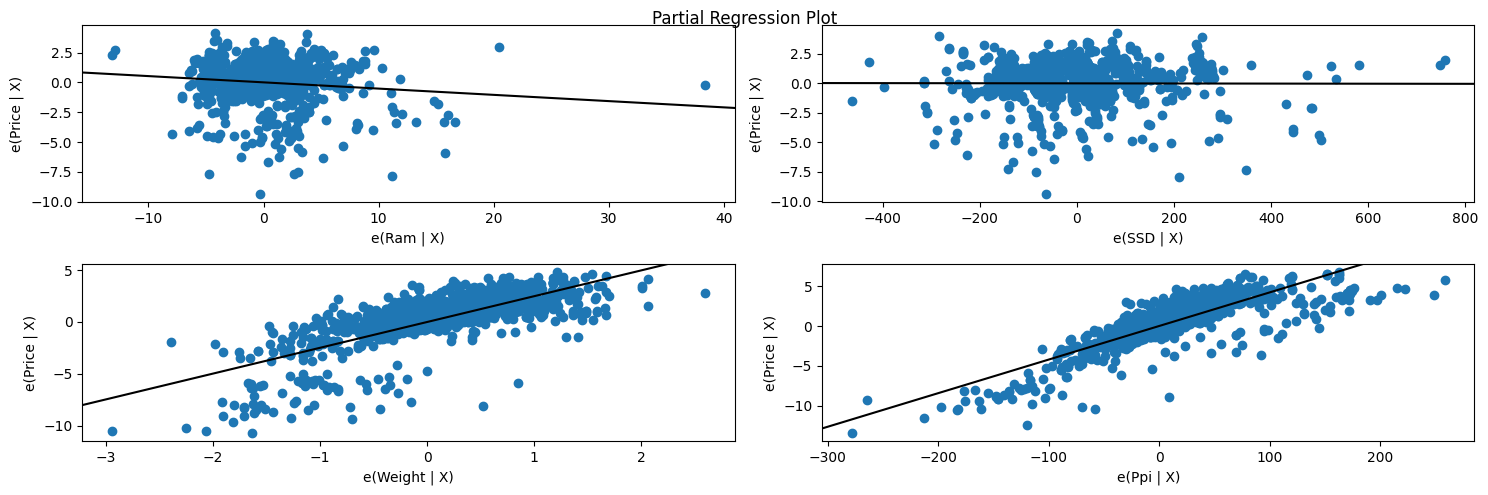

In [46]:
# Assuming you've fitted a model using statsmodels
model = sm.OLS(y, X)
model_results = model.fit()

# Plot part regression grid
fig = plt.figure(figsize=(15, 5))
sm.graphics.plot_partregress_grid(model_results, exog_idx=["Ram", "SSD", "Weight", "Ppi"], fig=fig)
plt.show()


#### Intepretation of the results

Coefficients:
Intercept (const): 9.5479

The intercept represents the expected value of the dependent variable (Price) when all independent variables are set to zero. However, in practical terms, this might not have a meaningful interpretation since some variables, like Ram and SSD, cannot be zero in reality.

Ram: 0.0459
Holding all other variables constant, a one-unit increase in Ram is associated with an increase in Price by 0.0459 units. This suggests that higher RAM is positively correlated with higher laptop prices.

SSD: 0.0011
Holding all other variables constant, a one-unit increase in SSD is associated with an increase in Price by 0.0011 units. This suggests that laptops with larger SSD storage tend to have higher prices.

HDD: 2.457e-05
The coefficient for HDD is very small and not statistically significant (p-value = 0.386). This suggests that HDD may not be a significant predictor of laptop prices in this model.

Ppi: 0.0035
Holding all other variables constant, a one-unit increase in Ppi is associated with an increase in Price by 0.0035 units. This suggests that higher Ppi (pixels per inch, a measure of display sharpness) is positively correlated with higher laptop prices.
Weight: 0.0830

Holding all other variables constant, a one-unit increase in Weight is associated with an increase in Price by 0.0830 units. This suggests that heavier laptops tend to have higher prices.

Model Fit:
R-squared: 0.599

Approximately 59.9% of the variability in laptop prices is explained by the model, indicating a moderate fit.
F-statistic: 378.1

The model is statistically significant, suggesting that at least one of the predictors is useful in predicting laptop prices.

Ram, SSD, Ppi, and Weight appear to be significant predictors of laptop prices. HDD does not seem to be a significant predictor in this model.


In [47]:
from scipy.stats import ttest_ind

#Separate data into touchscreen and non-touchscreen laptops
touchscreen_laptops = laptopprice[laptopprice['TouchScreen'] == 1]['Price']
non_touchscreen_laptops = laptopprice[laptopprice['TouchScreen'] == 0]['Price']

#Perform the t-test
t_statistic, p_value = ttest_ind(touchscreen_laptops, non_touchscreen_laptops)

t_statistic ,p_value 

(7.061175701240367, 2.71018955224957e-12)

t_statistic: The t-statistic is a measure of how far the means of the two groups are from each other, relative to the spread or variability of the data. In this case, the t-statistic is approximately 7.06.

p_value: The p-value is the probability of observing a t-statistic as extreme as the one computed from the sample data, assuming that the null hypothesis is true. A very small p-value (typically below a significance level, e.g., 0.05) indicates that you can reject the null hypothesis.

The p-value is very close to zero (2.71e-12, which is scientific notation for 0.00000000000271). This extremely low p-value suggests that there is strong evidence against the null hypothesis.


Null Hypothesis (H0): The average prices of touchscreen laptops and non-touchscreen laptops are the same.

Alternative Hypothesis (H1): The average prices of touchscreen laptops and non-touchscreen laptops are different.

Since the p-value is extremely small, much less than a typical significance level of 0.05, you would reject the null hypothesis. This suggests that there is significant evidence to conclude that there is a difference in the average prices between touchscreen and non-touchscreen laptops.

#### Hypothesis Testing using ANOVA:

Null Hypothesis (H0): The coefficients of all the independent variables are equal (no significant difference in their impact on laptop prices).

Alternate Hypothesis (H1): At least one independent variable has a different impact on laptop prices compared to others.

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols("Price ~ Ppi + Weight + Ram + SSD + Cpu_brand", data=laptopprice).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



               sum_sq      df           F         PR(>F)
Cpu_brand   71.148847     4.0  180.005618  4.141081e-122
Ppi         13.428340     1.0  135.894072   6.703385e-30
Weight       0.681451     1.0    6.896250   8.742020e-03
Ram         13.839015     1.0  140.050078   1.015865e-30
SSD          9.510420     1.0   96.244931   6.023366e-22
Residual   124.901855  1264.0         NaN            NaN


Now, let's interpret the results:

Cpu_brand: The p-value (PR(>F)) is very close to zero (4.141081e-122), indicating that there is a significant difference in the means of the groups defined by the Cpu_brand variable.

Ppi: Similarly, the p-value is close to zero (6.703385e-30), suggesting a significant difference in the means of the groups defined by the Ppi variable.

Weight: The p-value is 0.008742020, which is less than the conventional significance level of 0.05. This suggests that Weight is a significant factor in explaining the variation in the dependent variable.

Ram: The p-value is close to zero (1.015865e-30), indicating that Ram is a significant factor.

SSD: The p-value is close to zero (6.023366e-22), suggesting that SSD is a significant factor.

In summary, all the factors (Cpu_brand, Ppi, Weight, Ram, SSD) are statistically significant as their p-values are very close to zero. This means that each of these factors has a significant impact on the dependent variable in your analysis. The Residual row represents the unexplained variance in your model.

### GENERATING FINAL MODEL WITH CATEGORICAL VARIABLES

In [57]:
cpu_brands = laptopprice['Cpu_brand']
cpu_brands

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1268            Intel Core i7
1269            Intel Core i7
1270            Intel Core i7
1271    Other Intel Processor
1272            Intel Core i7
Name: Cpu_brand, Length: 1273, dtype: object

In [59]:
cpu_brands.value_counts()

Cpu_brand
Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64

Text(0.5, 1.0, 'Mean Price by CPU Brand')

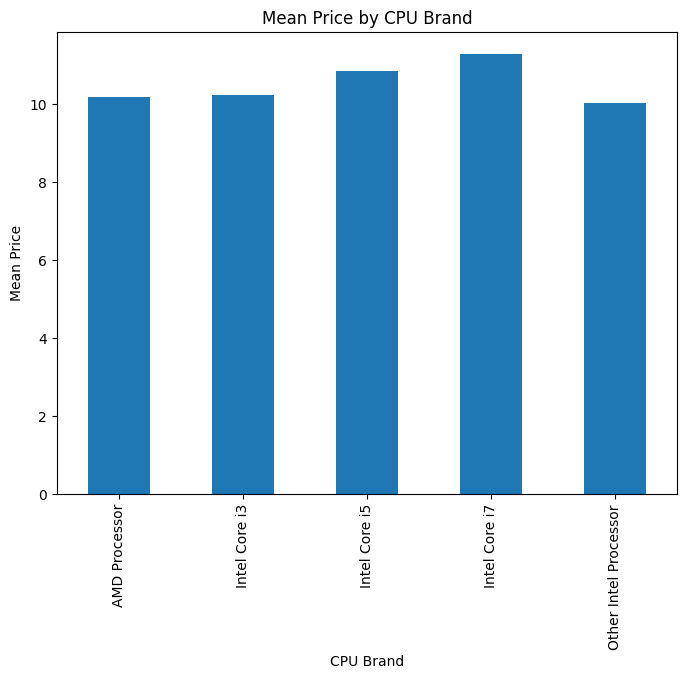

In [53]:
cpu_brand_mean_price = laptopprice.groupby("Cpu_brand")["Price"].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
cpu_brand_mean_price.plot(kind='bar', y="Price", ax=ax)

# Set labels and title
ax.set_xlabel("CPU Brand")
ax.set_ylabel("Mean Price")
ax.set_title("Mean Price by CPU Brand")

In [54]:
# Generating the Linear model

y = laptopprice['Price']  

# Selecting multiple columns in the independent variable
X = laptopprice[["Ppi","Weight", "Ram", "SSD", 'Cpu_brand']]  

# Creating dummy variables for the 'Cpu' column
X = pd.get_dummies(X, columns=["Cpu_brand"], drop_first=True, dtype=int)

# Adding a constant term to the independent variable
X = sm.add_constant(X)

# Creating and fitting the OLS model
model3 = sm.OLS(y, X)
results3 = model3.fit()

# Displaying the summary
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     459.7
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:22:08   Log-Likelihood:                -328.61
No. Observations:                1273   AIC:                             675.2
Df Residuals:                    1264   BIC:                             721.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.4574      0.067    141.923      0.000       9.327       9.588
Ppi                                 0.0030      0.000     11.657      0.000       0.003       0.004
Weight                              0.0455      0.017      2.626      0.009       0.012       0.079
Ram                                 0.0326      0.003     11.834      0.000       0.027       0.038
SSD                                 0.0007    6.9e-05      9.810      0.000       0.001       0.001
Cpu_brand_Intel Core i3             0.1244      0.049      2.542      0.011       0.028       0.220
Cpu_brand_Intel Core i5             0.5156      0.044     11.756      0.000       0.430       0.602
Cpu_brand_Intel Core i7             0.6497      0.045     14.370      0.000       0.561       0.738
Cpu_brand_Other Intel Processor    -0.1361      0.050     -2.749      0.006      -0.233      -0.039
==============================================================================
Omnibus:                       97.251   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.490
Skew:                           0.542   Prob(JB):                     1.57e-37
Kurtosis:                       4.422   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Visualization of final model

#### Interpretation of the Results

Model Fit:
R-squared: 0.744

R-squared measures the proportion of the variance in the dependent variable (Price) that is predictable from the independent variables (Ppi, Weight, Ram, SSD, Cpu_brand).
Adjusted R-squared: 0.743
Adjusted R-squared is similar to R-squared but penalizes for adding unnecessary variables to the model.

F-statistic: 459.7

The F-statistic tests the overall significance of the model. A high F-statistic with a low probability (Prob (F-statistic)) suggests that at least one independent variable significantly contributes to predicting the dependent variable.

Prob (F-statistic): 0.00
The p-value associated with the F-statistic is very low, indicating that the overall model is statistically significant.


Coefficients and Standard Errors:

const: The intercept of the regression equation = 9.4574
This would be the expected price value when all the indepedent varaibles are zero

coefficients for predicators:
Ppi = 0.003 implying that for each unit increase in Ppi, our target price increases by 0.003; 
pvalue associated with this coefficient is less than 0.05 implying that the coefficient is statistically significant

weight = 0.0455 impying that for each unit increase in weight, our target increases by 0.0455
pvalue associated with this coefficient is 0.09 which is higher than 0.05, impying weight is not statistically significant. We will consider dropping it.

Ram = 0.0326; implying that for each unit increase in Ram, our target increases by 0.0455
pvalue associated with ram is less than 0.05; impying that the coefficient is statistically significant

SSD = 0.0007; Holding all other variables constant, a one-unit increase in SSD is associated with an increase in Price by 0.0011 units. This suggests that laptops with larger SSD storage tend to have higher prices.
pvalue associated with SSD is less than 0.05 implying that the coefficient is statistically significant

Cpu_brand_Intel Core i3 = 0.1244; Compared to AMD processor we see an associated increase in price of 0.1244 with intel Core i3 processors: 
pvalue associated with Core i3 processor is 0.011, less than 0.05 impying the coefficient is statistically significant

Cpu_Brand_Intel Core i5 = 0.5156; impying that in Comparison with AMD processor we see an associated increase of 0.5156 with intel Core i5 processors
Pvalue associated with Core i5 is less than 0.05 impying it is statistically significant

Core i7 = 0.6497

Cpu_brand_Other Intel Processor	= - 0.1361; impylying that in Comparison with AMD Processors we see an associated decrease of 0.15 with other Cpu_brand Intel Processors


### CONCLUSION

#### In relation to Price, 
Model 1 
(Dep. Variable: Price, Predictor: Ram):
R-squared: 0.463
Coefficient for Ram: 0.0827 (p-value < 0.05)
Conclusion: The model explains 46.3% of the variance in laptop prices. The Ram variable has a significant positive effect on laptop prices.

#### Multiple Linear Regressio Model:
Model 2 (Dep. Variable: Price, Predictors: Ram, SSD, HDD, Ppi Weight):
R-squared: 0.599
Coefficients: Significant positive effects for Ram, SSD, Ppi, and Weight. HDD is not significant.
Conclusion: The model explains 59.9% of the variance in laptop prices. Ram, SSD, Ppi, and Weight are signifeant predictors.

#### ANOVA Test:
ANOVA Test (Predictor: Cpu_brand):
F-statistic: 180.01 (p-value < 0.05)
Conclusion: The Cpu_brand variable significantly affects laptop prices according to the ANOVA test.


#### T-Test:
T-Test (Comparing Touchscreen and Non-touchscreen Laptops):
t-statistic: 7.06
p-value: 2.71e-12
Conclusion: There is a significant difference in average prices between touchscreen and non-touchscreen laptops.

In summary, this model seems to have a relatively high R-squared, indicating a good fit, and the F-statistic suggests the overall model is statistically significant. The coefficients for each of the predictors provide insights into the relationship between the predictors and the target variable.

### RECOMMENDATIONS

The amount of RAM has a positive and significant impact on laptop prices in both the simple and multiple linear regression models. Consider emphasizing laptops with higher RAM in marketing or product development.
SSD, Ppi, and Weight are also significant predictors in the multiple linear regression model. Focus on these features to potentially increase the perceived value of laptops.
The choice of CPU brand significantly affects laptop prices, according to the ANOVA test. This may indicate that customers have preferences for certain CPU brands; consider leveraging this information in marketing strategies.
The t-test results suggest that there is a significant difference in prices between touchscreen and non-touchscreen laptops. This information can be used for pricing strategies or marketing targeting specific customer segments.
In summary, the regression models, ANOVA test, and t-test provide valuable insights into the factors influencing laptop prices. Use these findings to make informed decisions in product development, marketing, and pricing strategies.